# Notebook Summary


1.   Library importing
2.   Uploading the database to a Pandas dataframe
3.   Training Method of the Perceptron Class
4.   Showing that the Problem is suitable for a Linear Classifier
5.   Epoch/Erros Convergence Plot
6.   Plotting the Hyperplan Function separating the classes




# Observation
The Learning rate refines the result. It takes longer to converge. However, it gives a straight cleaner, centralized, better rating.

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Uploading the IRIS database to a Pandas Dataframe![texto alternativo](https://)

In [ ]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8') # Dataframe

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Perceptron Class

In [ ]:
class Perceptron (object):
  # Design Pattern indications for ML class
  """ Perceptron classifier

  Parameters
  -------------
  eta: float
    Learning rate (between 0. to 1.)
  n_epochs: int
    Number of epochs
  random_state: int
    Number for randomic weight generation
  
  Attributes
  --------------
  errors_: list
    Number of misclassifications in each iteration
  w_: {array-like}
    Weights after model fitting
  b_: {array-like}
    Bias after model fitting

  """
  #constructor of the Perceptron class
  def __init__(self, eta = 0.1, n_epochs = 100, random_state = 2, neurons = 1):
    self.eta = eta
    self.n_epochs = n_epochs
    self.random_state = random_state
    self.neurons = neurons
  
  def fit(self, X, y):
    """ Model fitting with our training data

    Parameters
    ------------
    X: {array-like} (Matrix), shape = [n_examples, n_features]
      Features matrix 
    y: {array-like} (Colum vector), shape = [n_labels, 1]
      targets
    
    Return 
    ----------
    self: object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = self.neurons*(X.shape[1]))
    self.b_ = rgen.normal(loc = 0.0, scale = 0.01, size = self.neurons)
    self.errors_ = []

    for i in range(0, self.n_epochs):
      errors = 0
      for n in range(0,self.neurons):
        for xi, target in zip(X,y):
          z = np.dot(xi, self.w_[n*X.shape[1]:n*X.shape[1] + X.shape[1] ]) + self.b_[n:n+1]
          y_pred = np.where(z>= 0, 1, -1) # hardlims function if z>=0 the y_pred will be 1 if z<0 the y_pred will be -1
          if (self.neurons>1):
            update = self.eta*(target[n] - y_pred)
          else:
            	update = self.eta*(target - y_pred) # Perceptron rule by Rosenblatt
          self.w_[n:n+X.shape[1]] += update*xi
          self.b_[n:n+1] += update
          errors += int (update != 0.0)
      self.errors_.append(errors)

    return self   

# Plotting the Data

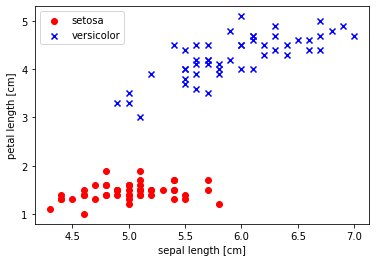

In [ ]:
# plot data

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values


plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
x1 = np.linspace(X[:,0].min(), X[:,0].max())

ppn = Perceptron(eta = 0.1, n_epochs=100, random_state=2, neurons=1)

ppn.fit(X,y)

x1 = np.linspace(X[:,0].min(), X[:,0].max())

#x2 = (-w[0]*x1 - b)/w[1]

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

# Observations regarding the plot above


> As we can see, the IRIS database can be classified by a Linear Classifier. We applied the scatterplot method from the matplotlib library to show the spatial
distribution of the data



# Code snippet below


> This code snippet below applies the Perceptron class to the given parameters: epochs, random state, neurons. 
> The parameters are explained by the design pattern snippet on the Perceptron class description
> The matplotlib plot show how many iterations the perceptron takes to converge based on the IRIS database and the given parameters


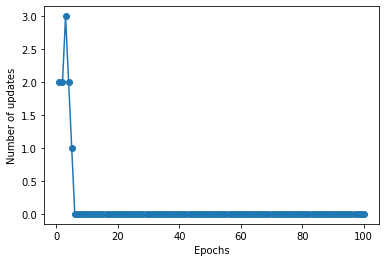

In [ ]:
#evokes the perceptron class parsing the following parameters
ppn = Perceptron(eta=0.1, n_epochs=100, random_state=14, neurons= 1)
#run the fit method from the perceptron class
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
# plt.savefig('images/02_07.png', dpi=300)
plt.rcParams["figure.figsize"] = [5,5]
plt.show()

#Showing the Hyperplan separating the both classes

> This plot aims to show the both setosa and versicolor classes from the IRIS database, how they are distributed.

> This plot also shows the hyperplan obtained by the fit method of the perceptron class

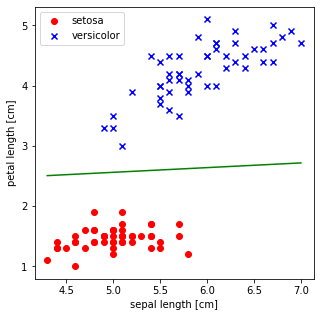

In [ ]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
x1 = np.linspace(X[:,0].min(), X[:,0].max())

ppn = Perceptron(eta = 0.001, n_epochs=100, random_state=2, neurons=1)

ppn.fit(X,y)

x1 = np.linspace(X[:,0].min(), X[:,0].max())

#x2 = (-w[0]*x1 - b)/w[1]
x2 = (-ppn.w_[0]*x1 - ppn.b_)/ppn.w_[1]
plt.plot(x1, x2, color='green')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

> As we can see, the plotted hyperplan separates the classes in a fitable way. Another perspection we can conclude from the given problem, is that the perceptron class has converged by doing only three iterations.

